In [1]:
import os
import ray
import random
import datetime

import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from util import *
from estimator import *
from evaluator import run_grid_search

os.environ.pop('http_proxy', None)

'http://192.168.0.1:8123'

### Parse CB data (same paper of TREC)

In [2]:
input_file = Path('./data/CB/train.jsonl')
results_folder = Path('./data/CB_RESULTS')
processed_data_file = Path('./data/CB_RESULTS/data.json')
dataset = 'CB'
class_labels = ["entailment", "contradiction", "neutral", "N/A"]
class_labels_to_id = {c_name: i for i, c_name in enumerate(class_labels)}

def parse_CB(input_file):
    
    data_list = []

    # Open the JSONL file and read line by line
    with open(input_file, 'r') as file:
        for line in file:
            # Parse JSON from each line
            json_obj = json.loads(line)

            # Extract relevant fields from the JSON object
            idx = json_obj['idx']
            premise = json_obj['premise']
            hypothesis = json_obj['hypothesis']
            label = json_obj['label']

            # Prepare the input string as specified
            input_text = f"Premise: {premise}\nHypothesis: {hypothesis}"

            # Create a new dictionary in the desired format
            new_entry = {
                "id": idx,
                "input": input_text,
                "class": label
            }

            # Append the new dictionary to the data list
            data_list.append(new_entry)

    return data_list


if not os.path.exists(processed_data_file):
    data_list = parse_CB(input_file)  # do not count NA

    # Serialize the dictionary to a JSON string
    json_data = json.dumps(data_list)

    # Write the JSON string to a file
    with open(processed_data_file, 'w') as f:
        f.write(json_data)
else:
    with open(processed_data_file, 'r') as f:
        data_list = json.load(f)


n_samples = len(data_list)
sample_ids = [s["id"] for s in data_list]

def class_extractor_fun(text):
    # we might want to check if more than a word is returned, but does not seem strictly necessary
    for l in class_labels:
        if l.lower() in text.lower():
            return l
    # if no label has been found
    return "N/A"

In [3]:
# s_id = 1
# print(data_list[s_id]['input'])
# print(data_list[s_id]['class'])

## Run a grid search over parameters

In [4]:
question_to_rewrite = "You are given a premise and a hypothesis as input. Determine is there is entailment, contradiction, or a neutral relation between the premise and the hypothesis."

prompt_simple = [
    ["system", "You are a text entailment system."],
    ["user", "You are given a premise and a hypothesis as input. Determine is there is entailment, contradiction, or a neutral relation between the premise and the hypothesis.\nAnswer with the class name only.\nThe possible classes are: entailment, contradiction, and neutral.\nHere is the text: {summary}"]    
]

prompt_instruct = [
    ["system", "You are a text entailment system."],
    ["user", "You are given a premise and a hypothesis as input. Determine is there is entailment, contradiction, or a neutral relation between the premise and the hypothesis.\nAnswer with the class name only.\nThe possible classes are: \n- entailment: a logical relationship where the meaning of one text (the hypothesis) is necessarily implied by another text (the premise), \n- contradiction: when two texts express mutually exclusive statements \n- neutral: a state where two texts are independent and their truth values do not affect each other.\nHere is the text: {summary}"]    
]


prompt_fewshot = [
    ["system", "You are a text entailment system."],
    ["user",
     "You are given a premise and a hypothesis as input. Determine is there is entailment, contradiction, or a neutral relation between the premise and the hypothesis.\nAnswer with the class name only.\nThe possible classes are: entailment, contradiction, and neutral.\n"
     "Here are a few examples:\n"
     "Example 1:\n"
     "Premise: Your turn. B: Okay. Uh, I don't think they should abolish it. Hypothesis:\n they should abolish it. Label: contradiction\n"
     "Example 2:\n"
     "Premise: And I don't want to have to lie to them. The kidnappers have given us until October the eleventh to deliver the document and I haven't despaired of finding it before then. But if the police learn I 've been to America they 'll ask why. Hypothesis:\n he's been to America. Label: entailment\n"
     "Example 3:\n"
     "Premise: Who knows? The point is, do we go with it or not?'' Do we assume there is a shipment? Hypothesis: there is a shipment. Label: neutral\n"
     "Here is the text: {summary}"]
]


prompt_types = {"simple": prompt_simple,
               "instruct": prompt_instruct,
               "fewshot": prompt_fewshot}

llms = ['llama3', 'mixtral']#, 'gpt-3.5', 'gpt-4o']
Qs = [30] # number of equivalent but alternative questions compared to original question
temp_questions = [0.]#list(np.arange(0., 1.25, 0.25))  # temperature of the LLM used to produce questions
As = [1] # number of alternative answers for each questions
temp_answers =  [0.] # list(np.arange(0., 1.5, 0.25))  # temperature of the LLM used to produce answers

samples = data_list
n_samples = len(samples)
print(f'Num test examples is {len(samples)}')

Num test examples is 250


In [5]:
run_grid_search(samples,
                llms,
                prompt_types,
                Qs,
                temp_questions,
                question_to_rewrite,
                As,
                temp_answers,
                class_labels,
                class_extractor_fun,
                results_folder)

2024-08-02 13:11:47,409	INFO worker.py:1621 -- Started a local Ray instance.


Skipping test 0_llama3_30_1_0.0_0.0
Skipping test 1_llama3_30_1_0.0_0.0
Skipping test 2_llama3_30_1_0.0_0.0
Skipping test 3_llama3_30_1_0.0_0.0
Skipping test 4_llama3_30_1_0.0_0.0
Skipping test 5_llama3_30_1_0.0_0.0
Skipping test 6_llama3_30_1_0.0_0.0
Skipping test 7_llama3_30_1_0.0_0.0
Skipping test 8_llama3_30_1_0.0_0.0
Skipping test 9_llama3_30_1_0.0_0.0
Skipping test 10_llama3_30_1_0.0_0.0
Skipping test 11_llama3_30_1_0.0_0.0
Skipping test 12_llama3_30_1_0.0_0.0
Skipping test 13_llama3_30_1_0.0_0.0
Skipping test 14_llama3_30_1_0.0_0.0
Skipping test 15_llama3_30_1_0.0_0.0
Skipping test 16_llama3_30_1_0.0_0.0
Skipping test 17_llama3_30_1_0.0_0.0
Skipping test 18_llama3_30_1_0.0_0.0
Skipping test 19_llama3_30_1_0.0_0.0
Skipping test 20_llama3_30_1_0.0_0.0
Skipping test 21_llama3_30_1_0.0_0.0
Skipping test 22_llama3_30_1_0.0_0.0
Skipping test 23_llama3_30_1_0.0_0.0
Skipping test 24_llama3_30_1_0.0_0.0
Skipping test 25_llama3_30_1_0.0_0.0
Skipping test 26_llama3_30_1_0.0_0.0
Skipping te

2024-08-02 13:11:53,310	INFO worker.py:1621 -- Started a local Ray instance.


Skipping test 0_llama3_30_1_0.0_0.0
Skipping test 1_llama3_30_1_0.0_0.0
Skipping test 2_llama3_30_1_0.0_0.0
Skipping test 3_llama3_30_1_0.0_0.0
Skipping test 4_llama3_30_1_0.0_0.0
Skipping test 5_llama3_30_1_0.0_0.0
Skipping test 6_llama3_30_1_0.0_0.0
Skipping test 7_llama3_30_1_0.0_0.0
Skipping test 8_llama3_30_1_0.0_0.0
Skipping test 9_llama3_30_1_0.0_0.0
Skipping test 10_llama3_30_1_0.0_0.0
Skipping test 11_llama3_30_1_0.0_0.0
Skipping test 12_llama3_30_1_0.0_0.0
Skipping test 13_llama3_30_1_0.0_0.0
Skipping test 14_llama3_30_1_0.0_0.0
Skipping test 15_llama3_30_1_0.0_0.0
Skipping test 16_llama3_30_1_0.0_0.0
Skipping test 17_llama3_30_1_0.0_0.0
Skipping test 18_llama3_30_1_0.0_0.0
Skipping test 19_llama3_30_1_0.0_0.0
Skipping test 20_llama3_30_1_0.0_0.0
Skipping test 21_llama3_30_1_0.0_0.0
Skipping test 22_llama3_30_1_0.0_0.0
Skipping test 23_llama3_30_1_0.0_0.0
Skipping test 24_llama3_30_1_0.0_0.0
Skipping test 25_llama3_30_1_0.0_0.0
Skipping test 26_llama3_30_1_0.0_0.0
Skipping te

2024-08-02 13:11:59,162	INFO worker.py:1621 -- Started a local Ray instance.


Skipping test 0_llama3_30_1_0.0_0.0
Skipping test 1_llama3_30_1_0.0_0.0
Skipping test 2_llama3_30_1_0.0_0.0
Skipping test 3_llama3_30_1_0.0_0.0
Skipping test 4_llama3_30_1_0.0_0.0
Skipping test 5_llama3_30_1_0.0_0.0
Skipping test 6_llama3_30_1_0.0_0.0
Skipping test 7_llama3_30_1_0.0_0.0
Skipping test 8_llama3_30_1_0.0_0.0
Skipping test 9_llama3_30_1_0.0_0.0
Skipping test 10_llama3_30_1_0.0_0.0
Skipping test 11_llama3_30_1_0.0_0.0
Skipping test 12_llama3_30_1_0.0_0.0
Skipping test 13_llama3_30_1_0.0_0.0
Skipping test 14_llama3_30_1_0.0_0.0
Skipping test 15_llama3_30_1_0.0_0.0
Skipping test 16_llama3_30_1_0.0_0.0
Skipping test 17_llama3_30_1_0.0_0.0
Skipping test 18_llama3_30_1_0.0_0.0
Skipping test 19_llama3_30_1_0.0_0.0
Skipping test 20_llama3_30_1_0.0_0.0
Skipping test 21_llama3_30_1_0.0_0.0
Skipping test 22_llama3_30_1_0.0_0.0
Skipping test 23_llama3_30_1_0.0_0.0
Skipping test 24_llama3_30_1_0.0_0.0
Skipping test 25_llama3_30_1_0.0_0.0
Skipping test 26_llama3_30_1_0.0_0.0
Skipping te

Prompt type: simple


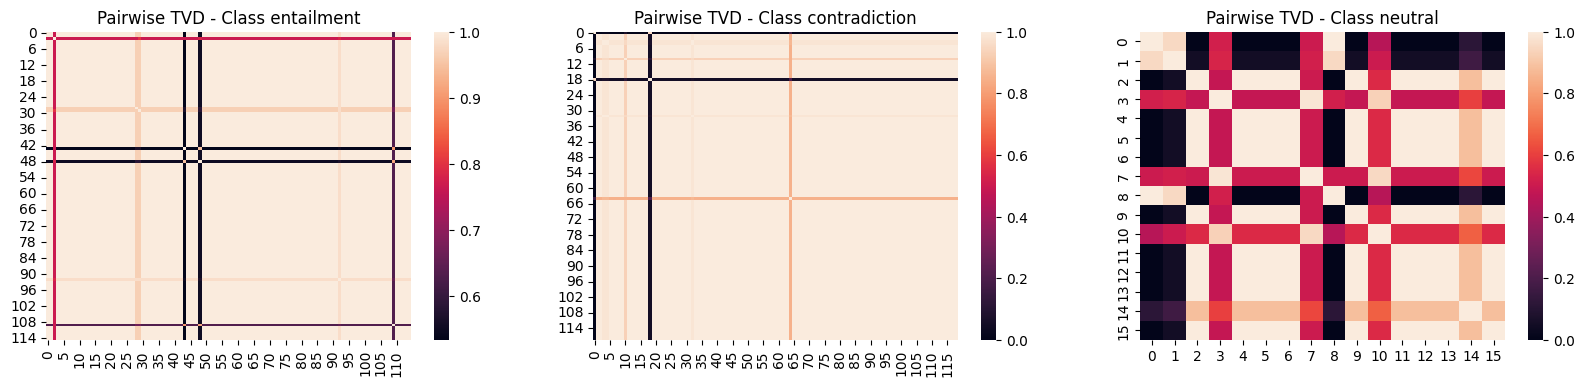

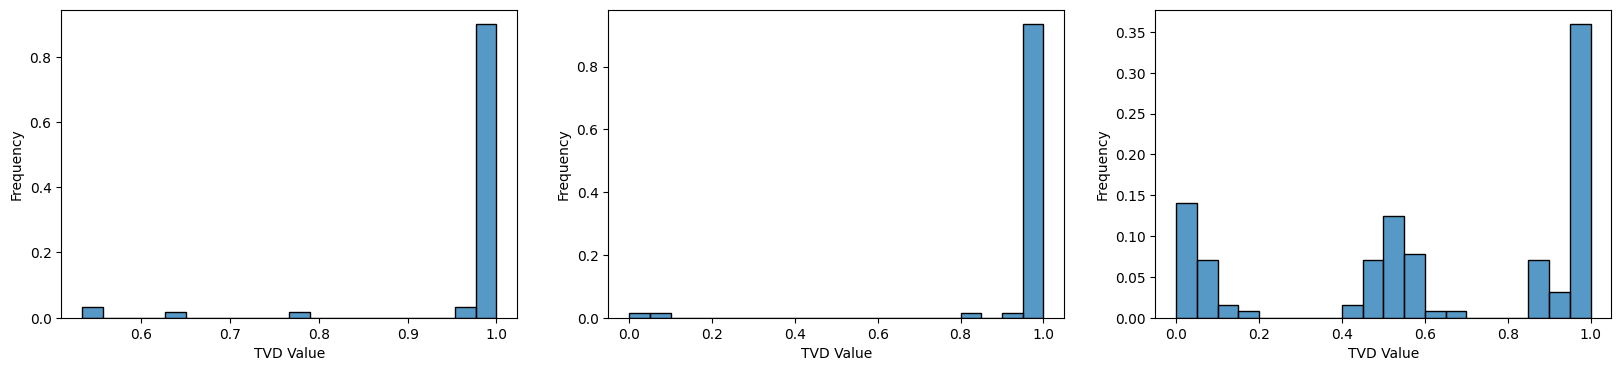

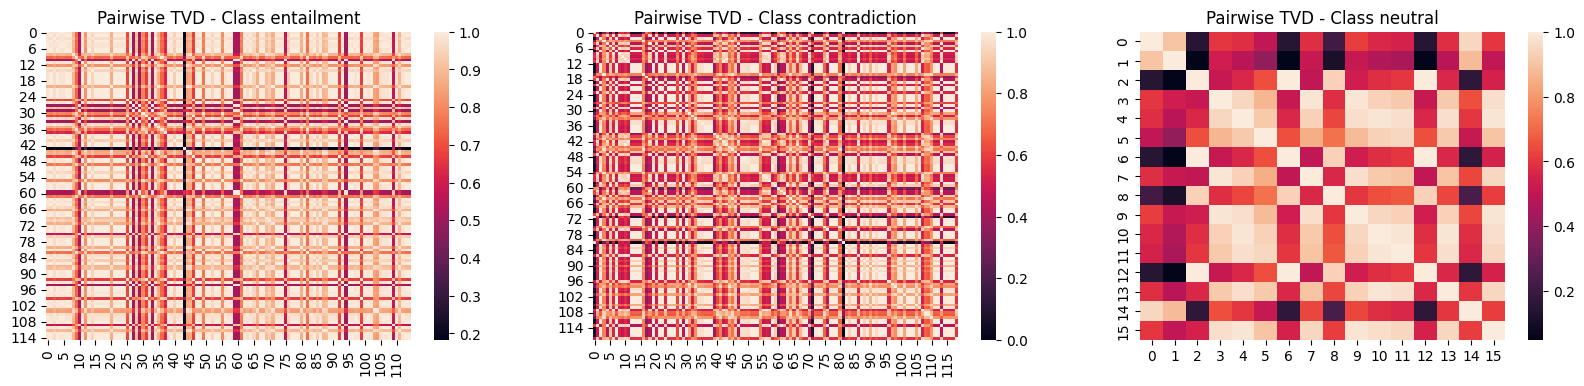

Prompt type: instruct


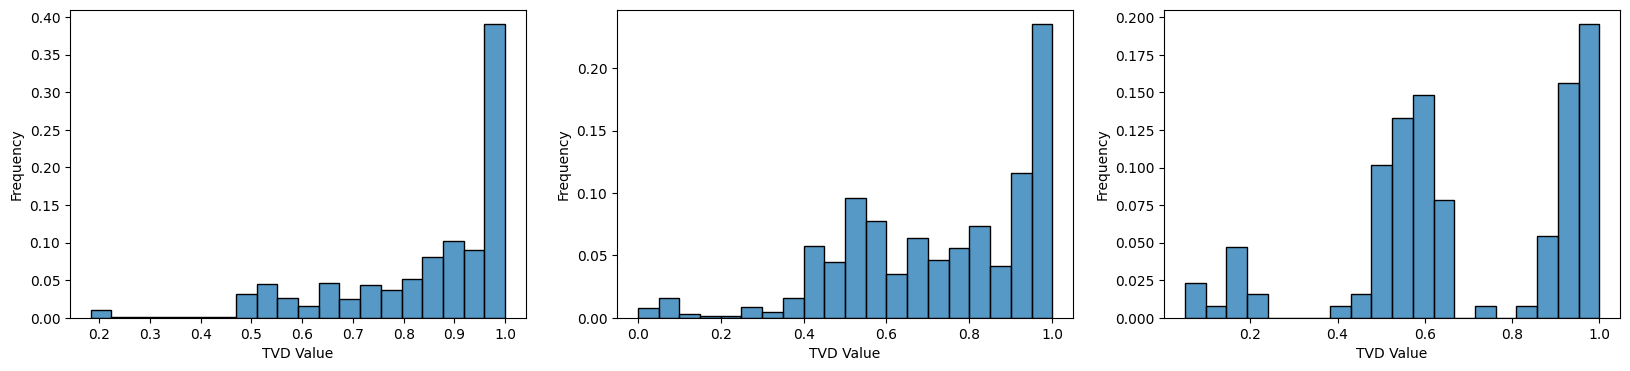

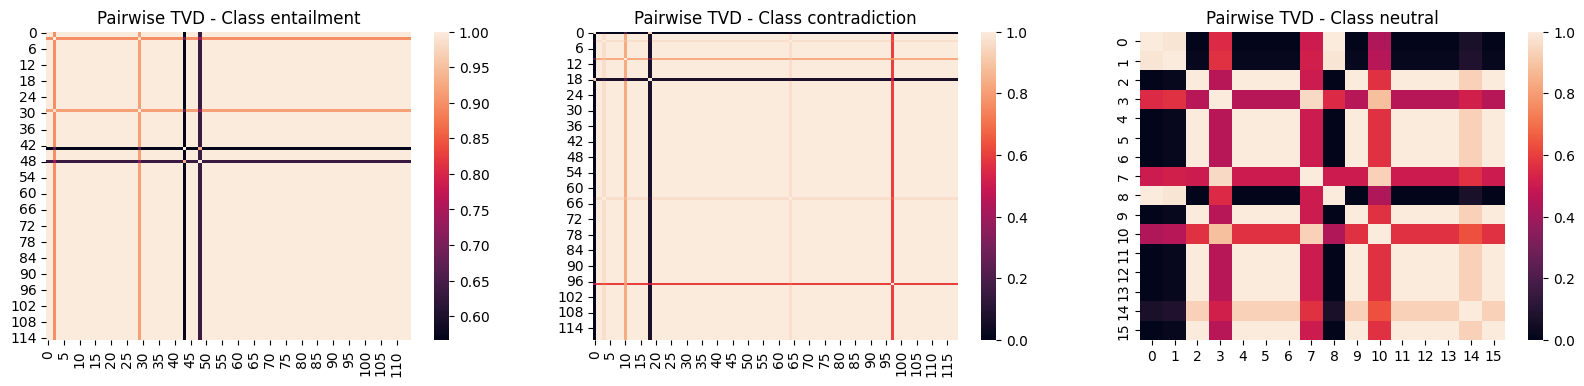

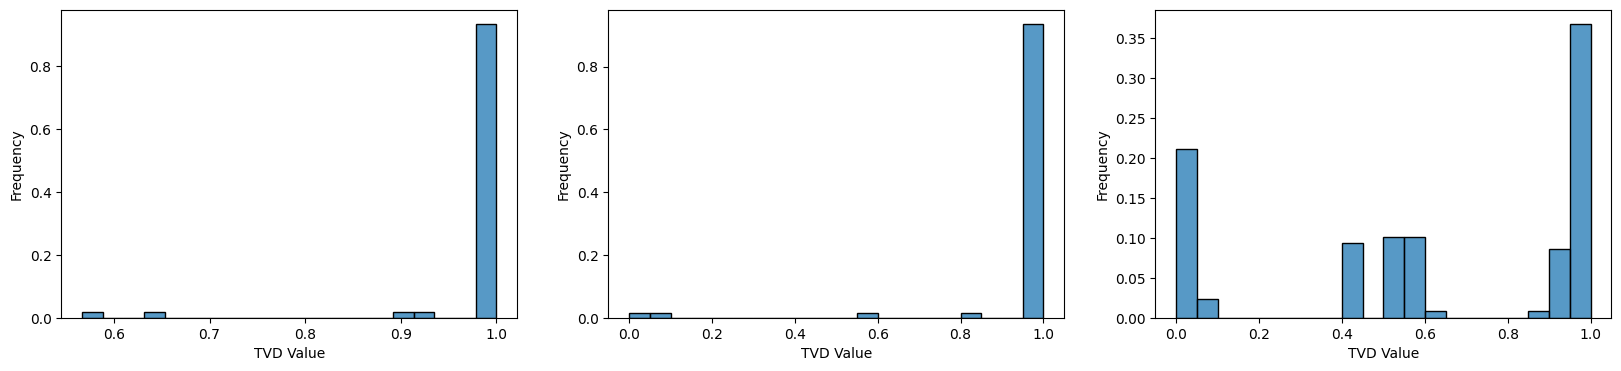

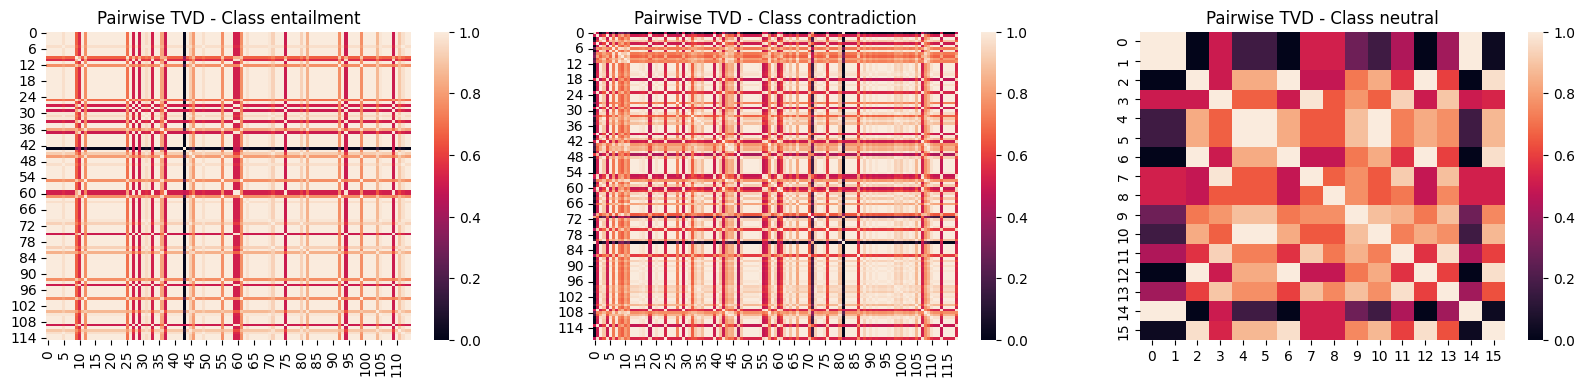

Prompt type: fewshot


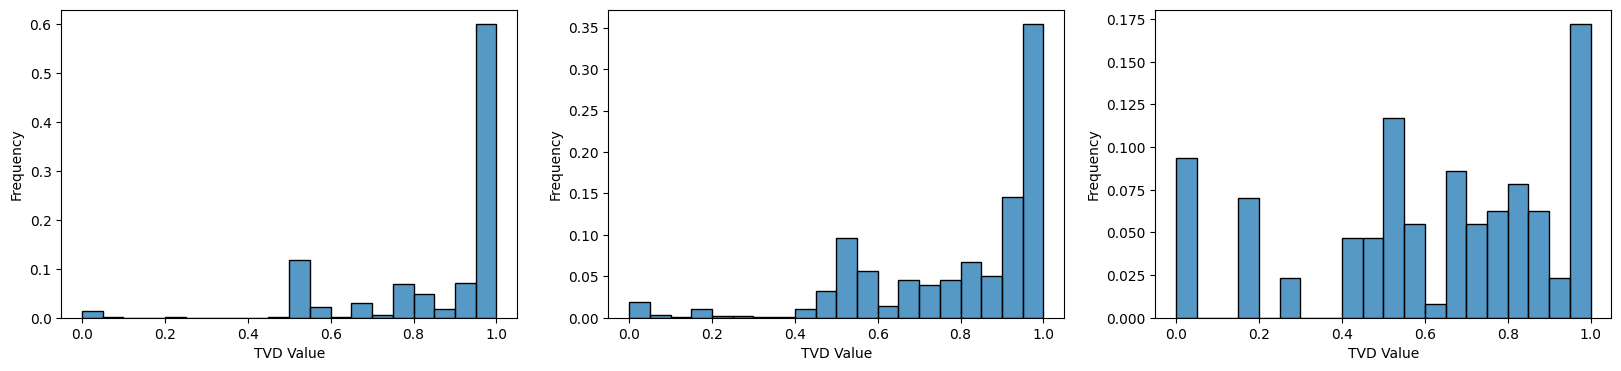

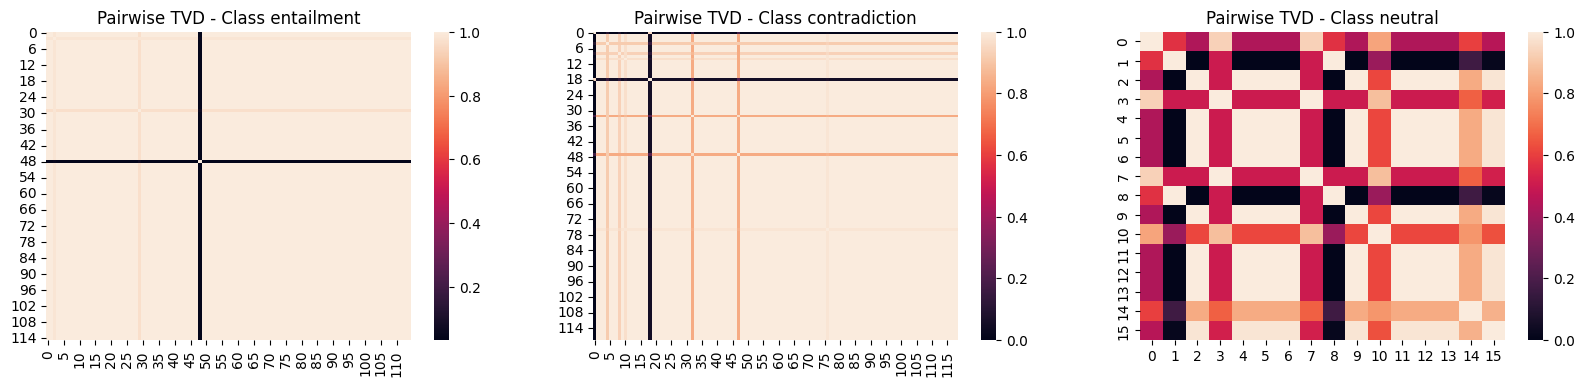

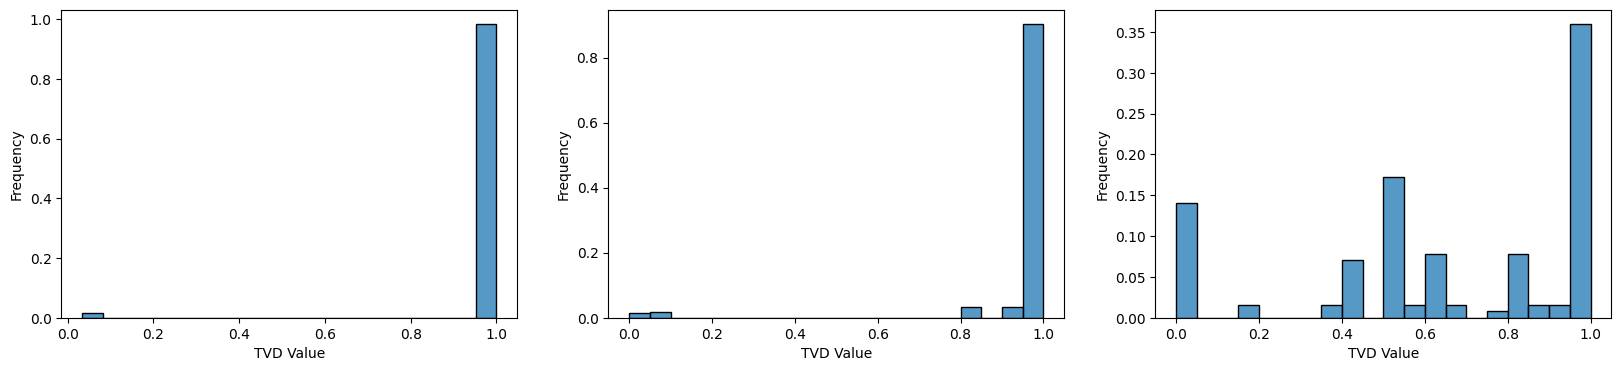

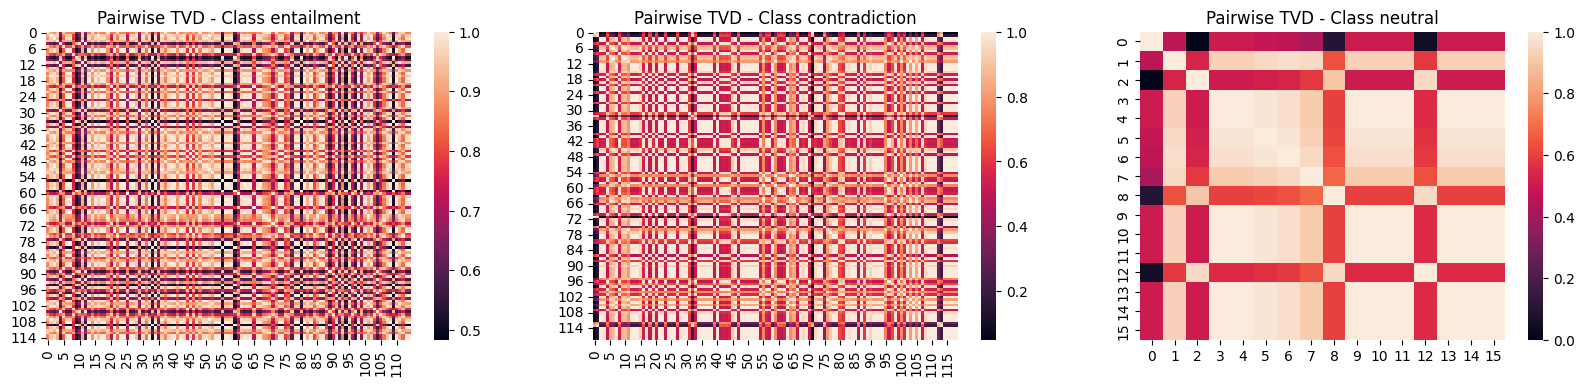

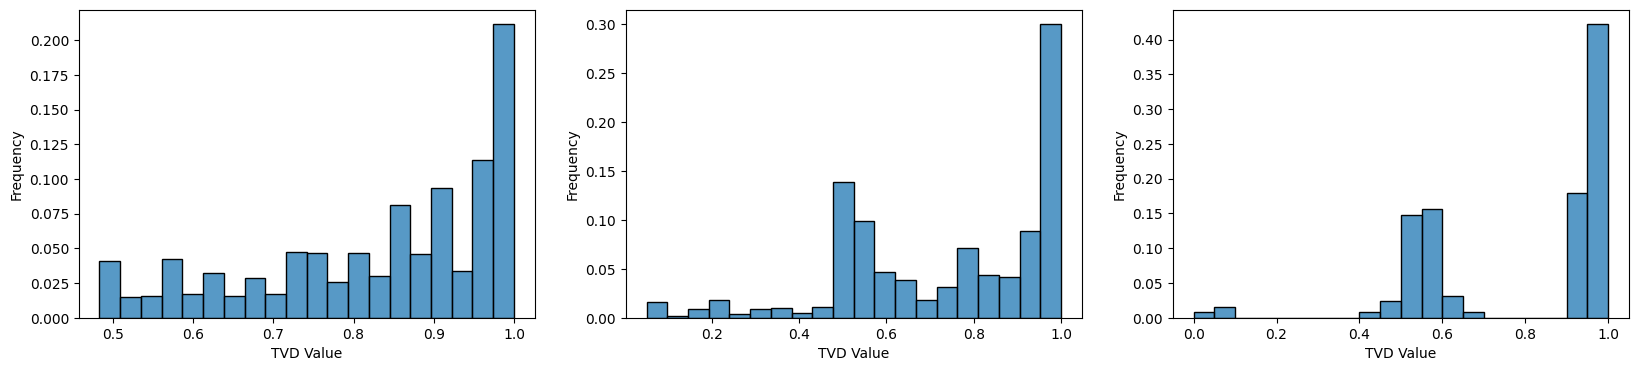

In [6]:
plot_TVD_info(sample_ids,
              prompt_types,
              llms,
              Qs,
              temp_questions,
              As,
              temp_answers,
              class_labels,
              results_folder)

Prompt type: simple


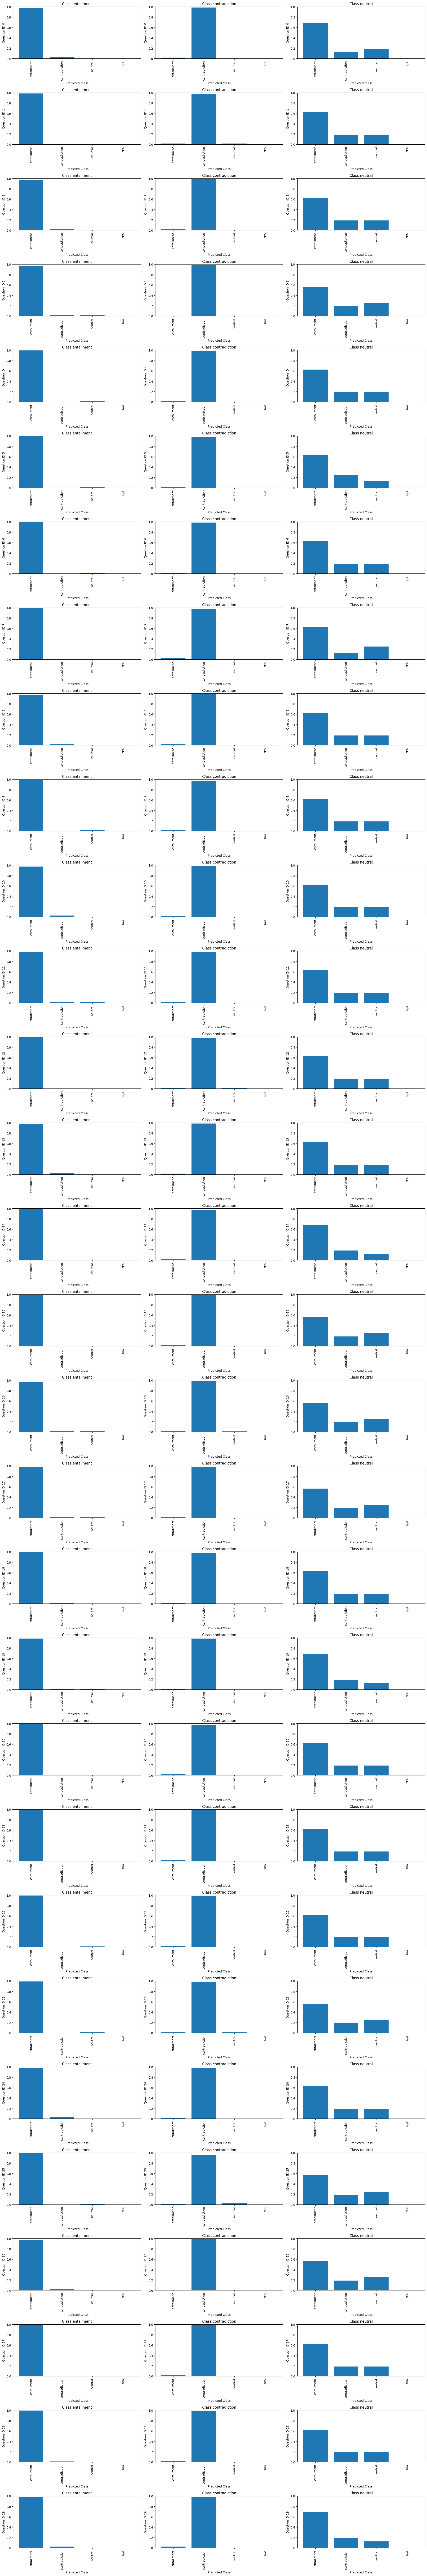

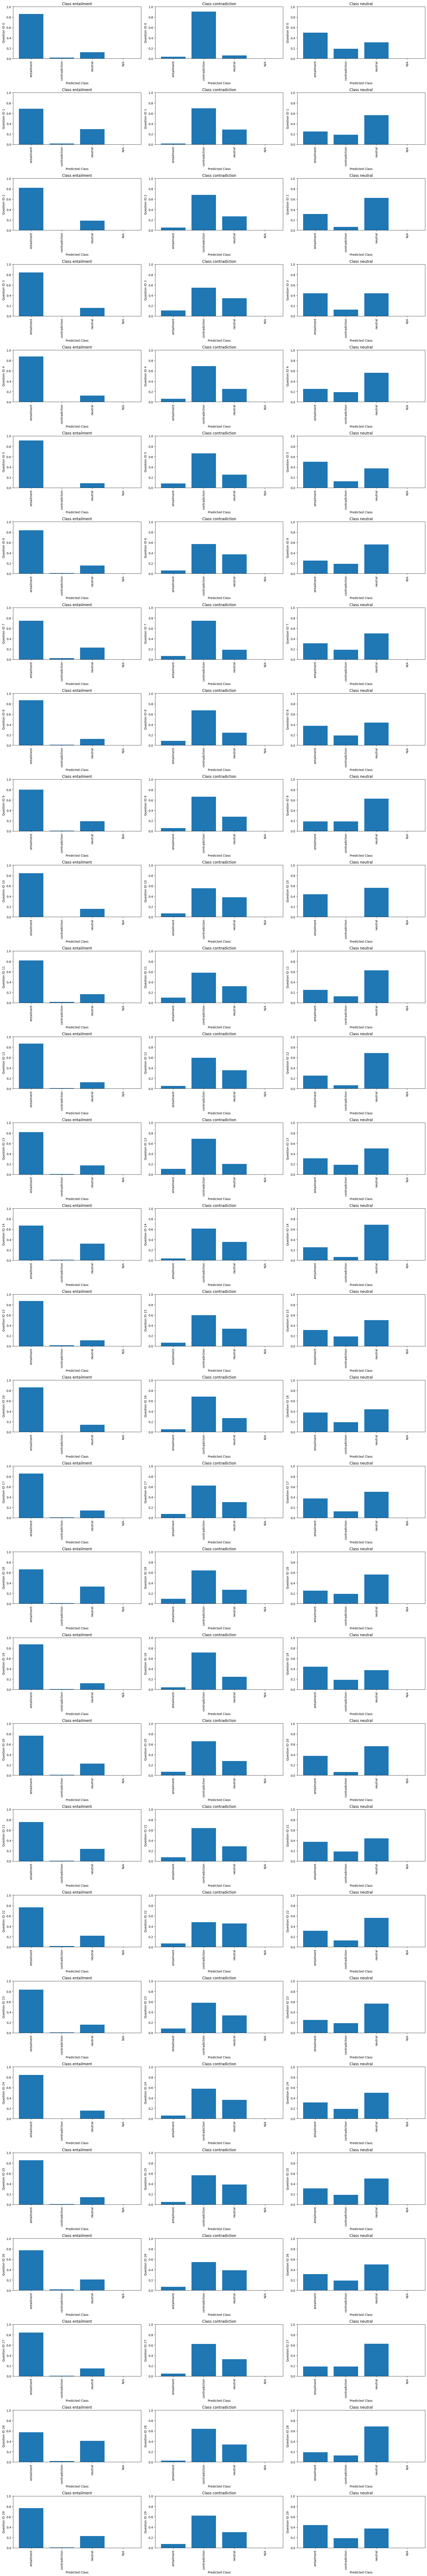

Prompt type: instruct


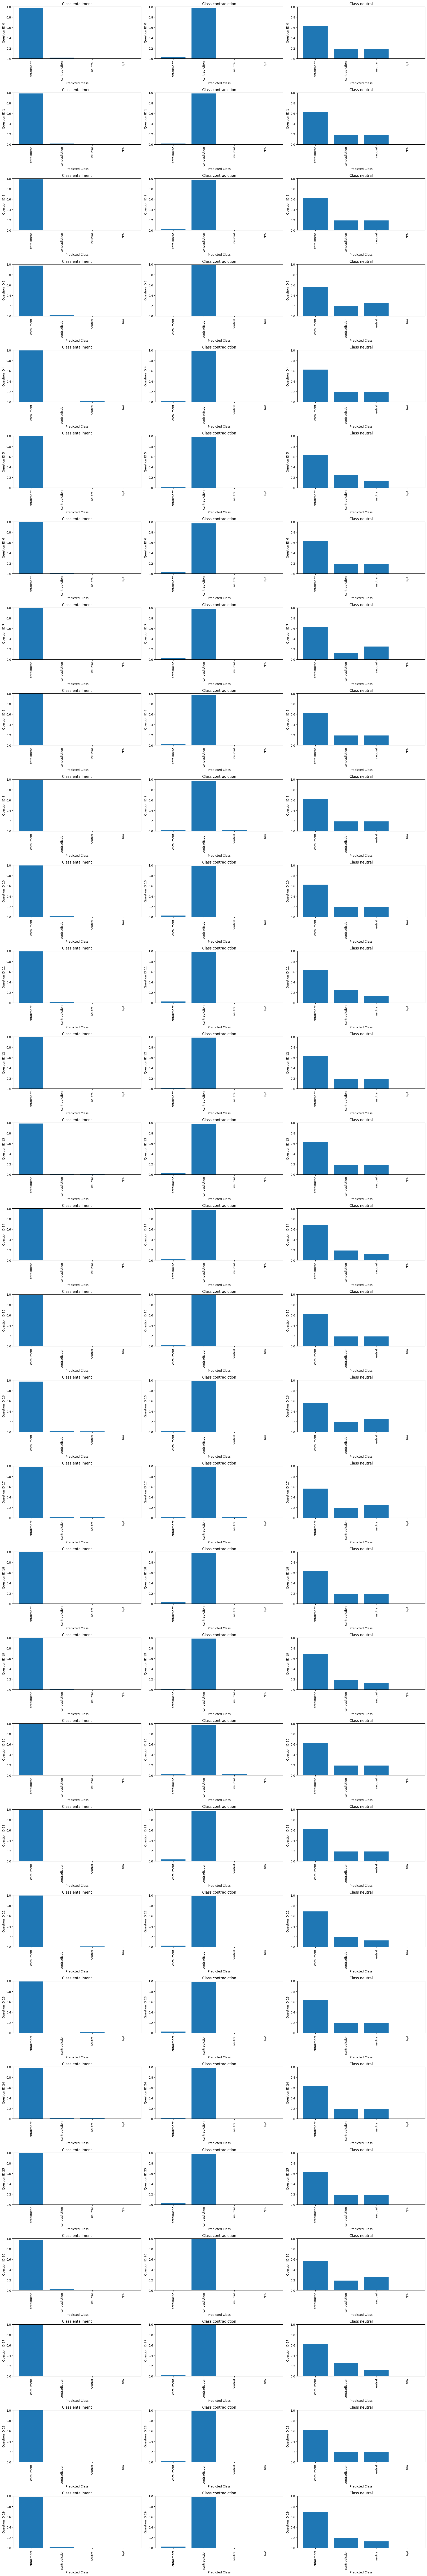

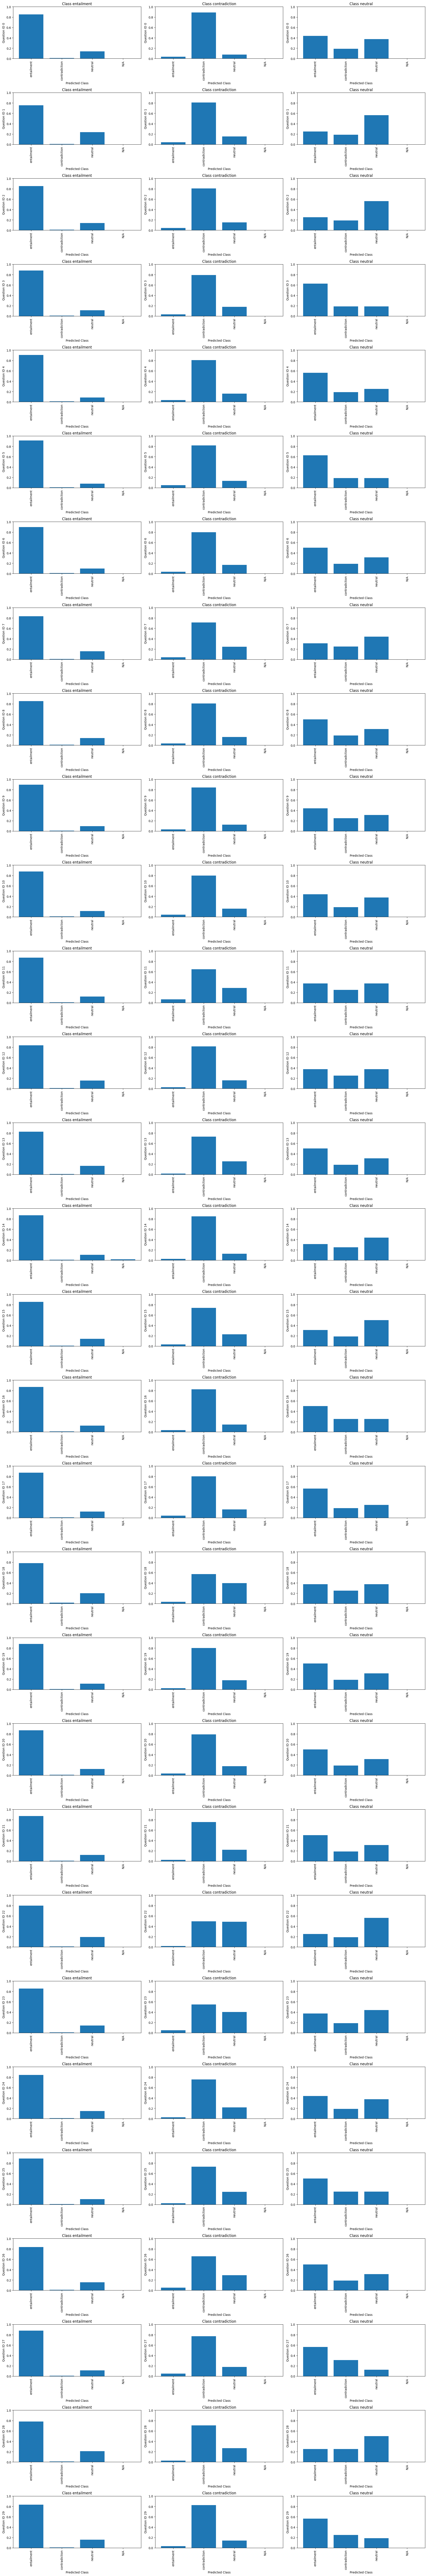

Prompt type: fewshot


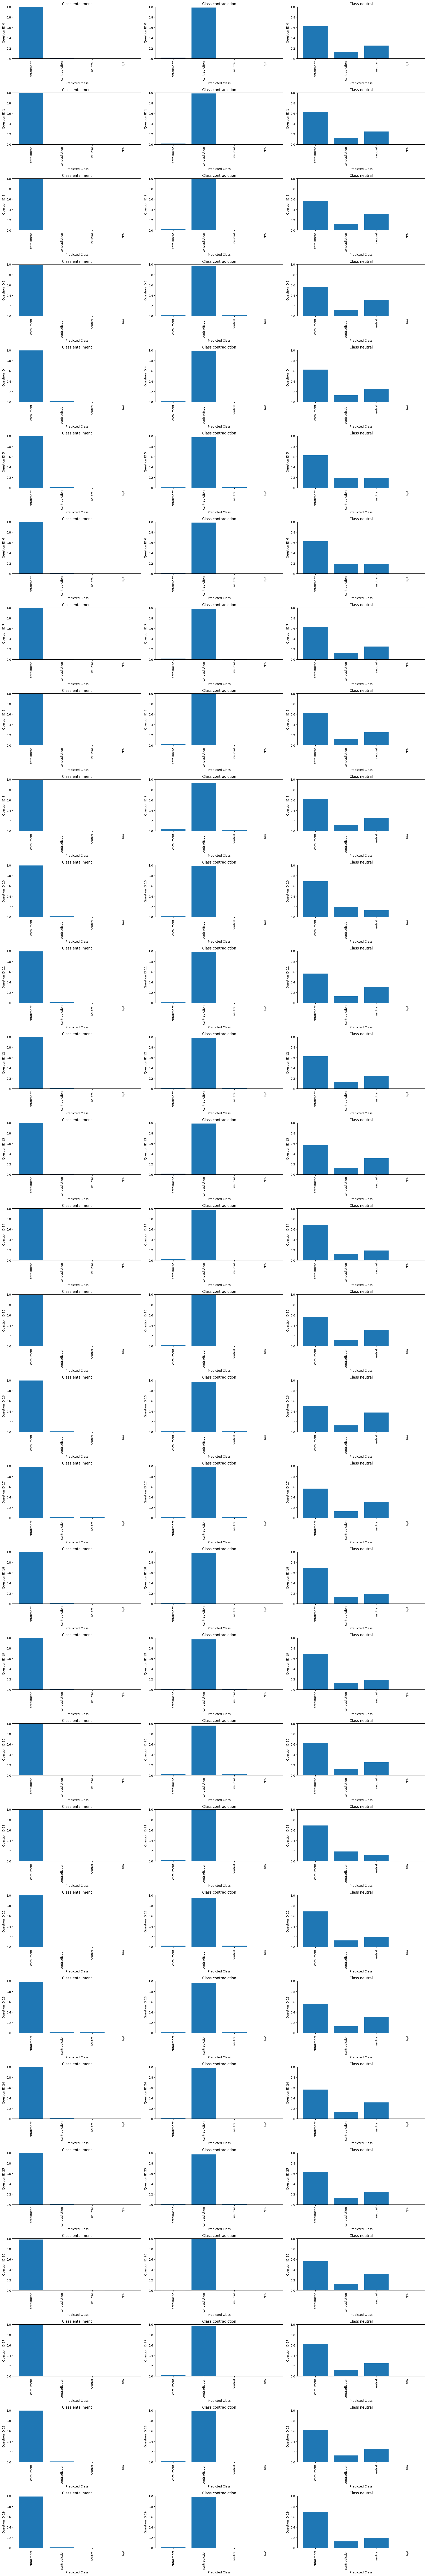

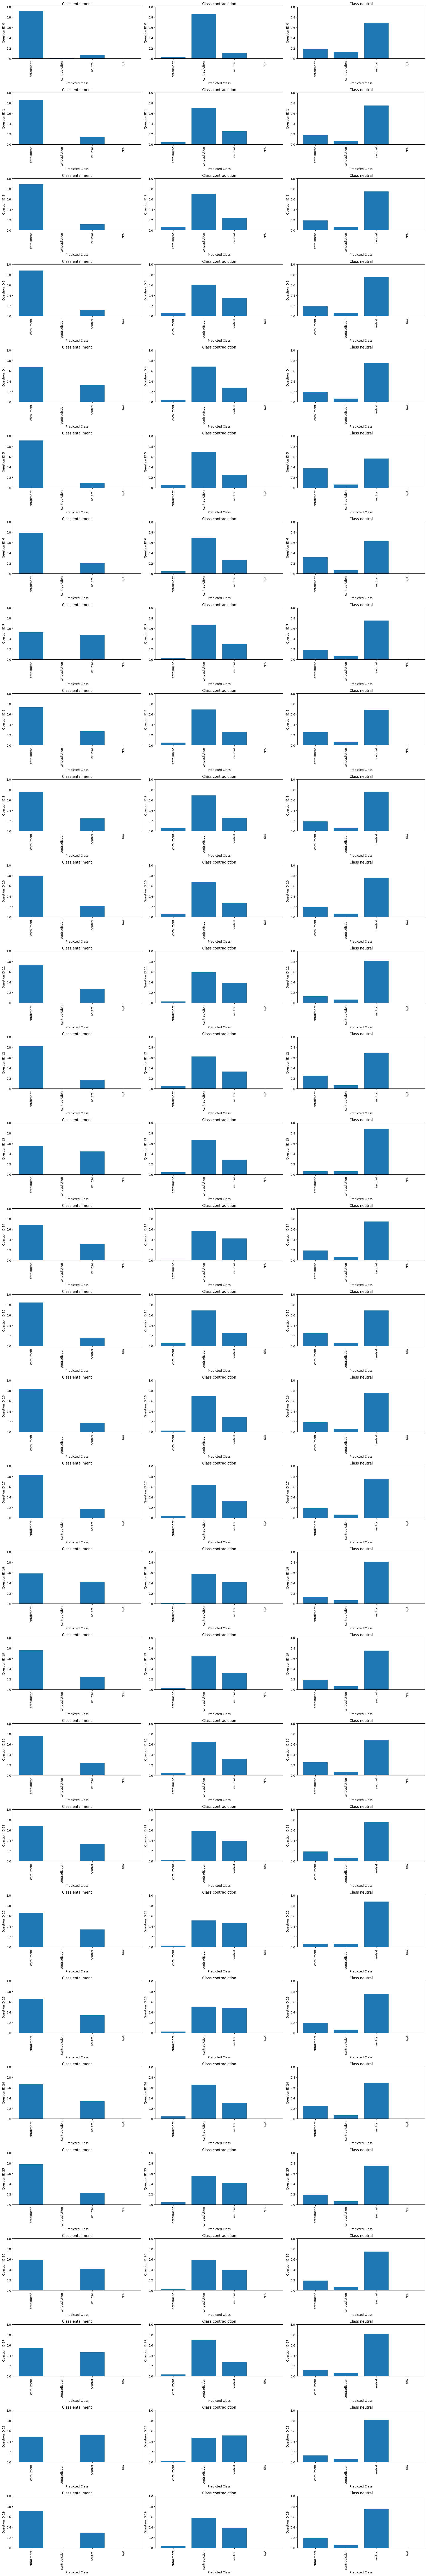

In [7]:
plot_questions_vs_predicted_distribution(sample_ids,
                                        prompt_types,
                                        llms,
                                        Qs,
                                        temp_questions,
                                        As,
                                        temp_answers,
                                        class_labels,
                                        results_folder)

Prompt type: simple


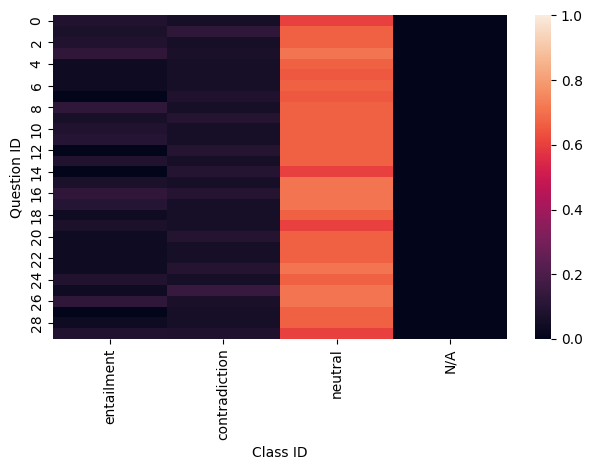

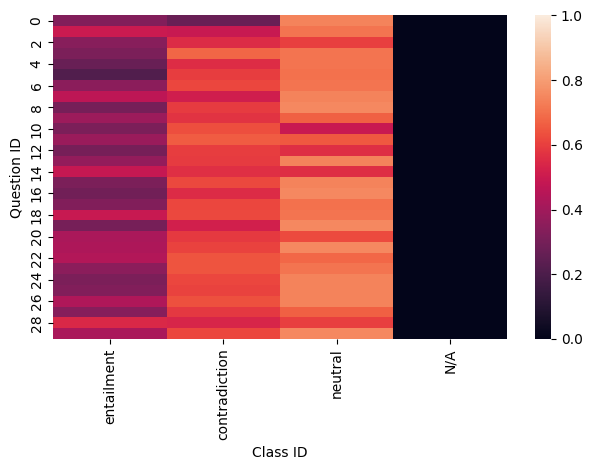

Prompt type: instruct


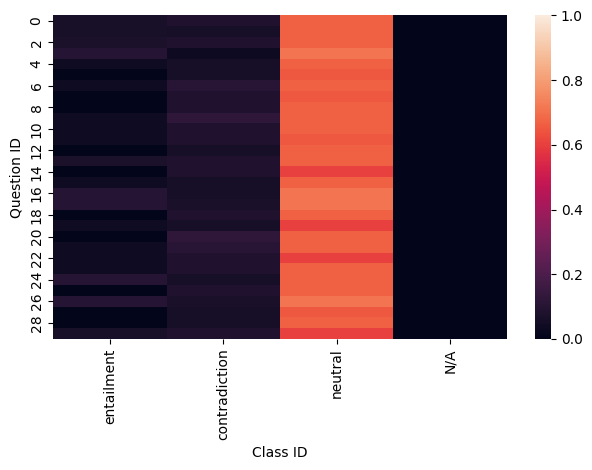

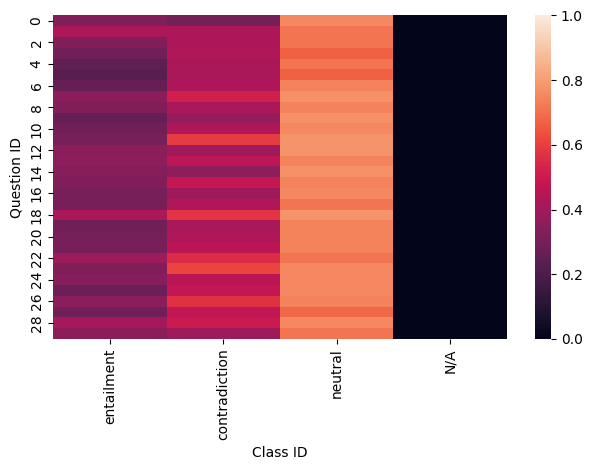

Prompt type: fewshot


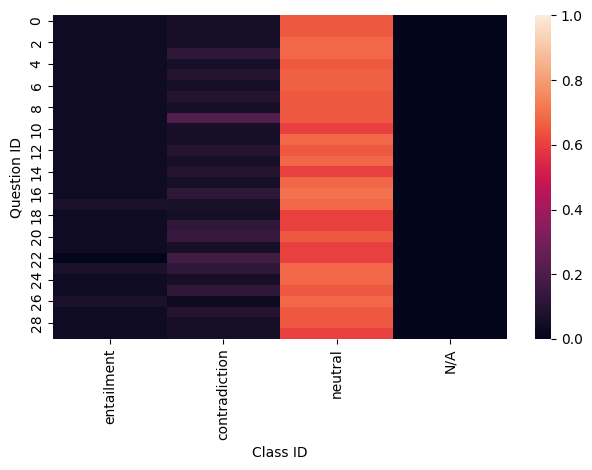

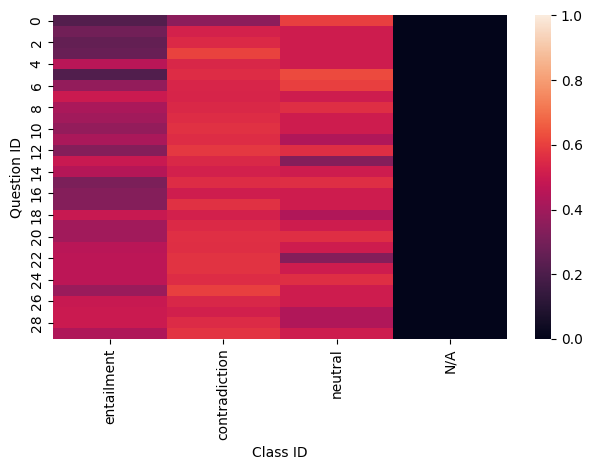

In [8]:
plot_questions_vs_class_sensitivity(sample_ids,
                               prompt_types,
                               llms,
                               Qs,
                               temp_questions,
                               As,
                               temp_answers,
                               class_labels,
                               results_folder)

In [5]:
for llm in ['llama3', 'mixtral', 'gpt-3.5', 'gpt-4o']:
    for prompt_type in ['simple', 'instruct', 'fewshot']:
        print(llm, prompt_type)
        Q = 30
        A = 1  # MUST stay 1
        temp_question = 0.
        temp_answer = 0.
        max_value = 1
        
        print_classification_scores(sample_ids,
                                    prompt_type,
                                    llm,
                                    Q,
                                    temp_question,
                                    A,
                                    temp_answer,
                                    class_labels,
                                    results_folder)

llama3 simple
Global scores, accuracy: 0.92, micro f1-score: 0.92, macro f1-score: 0.7047794682649454
Standard deviation of microf1 score: 0.005026153819992194
llama3 instruct
Global scores, accuracy: 0.924, micro f1-score: 0.924, macro f1-score: 0.7075910621365167
Standard deviation of microf1 score: 0.004176122603564204
llama3 fewshot
Global scores, accuracy: 0.936, micro f1-score: 0.936, macro f1-score: 0.7456725773075795
Standard deviation of microf1 score: 0.006489649879273541
mixtral simple
Global scores, accuracy: 0.672, micro f1-score: 0.672, macro f1-score: 0.5659263821422225
Standard deviation of microf1 score: 0.048416893286905086
mixtral instruct
Global scores, accuracy: 0.788, micro f1-score: 0.788, macro f1-score: 0.617045617045617
Standard deviation of microf1 score: 0.049238828400178465
mixtral fewshot
Global scores, accuracy: 0.652, micro f1-score: 0.652, macro f1-score: 0.5861264547355807
Standard deviation of microf1 score: 0.07648779132791209
gpt-3.5 simple
Global s

In [ ]:
plot_avg_sensitivity(sample_ids,
                 prompt_types,
                 ['llama3'],
                 Qs,
                 [0.],
                 As,
                 temp_answers,
                 class_labels,
                 results_folder)

llama3 simple
Avg Entropy over samples: 0.01849702694127149,Std (over questions): 0.08292379393338395
llama3 instruct
Avg Entropy over samples: 0.016017080609312055,Std (over questions): 0.0734592261159772
llama3 fewshot
Avg Entropy over samples: 0.014100250233563837,Std (over questions): 0.0675239498433903


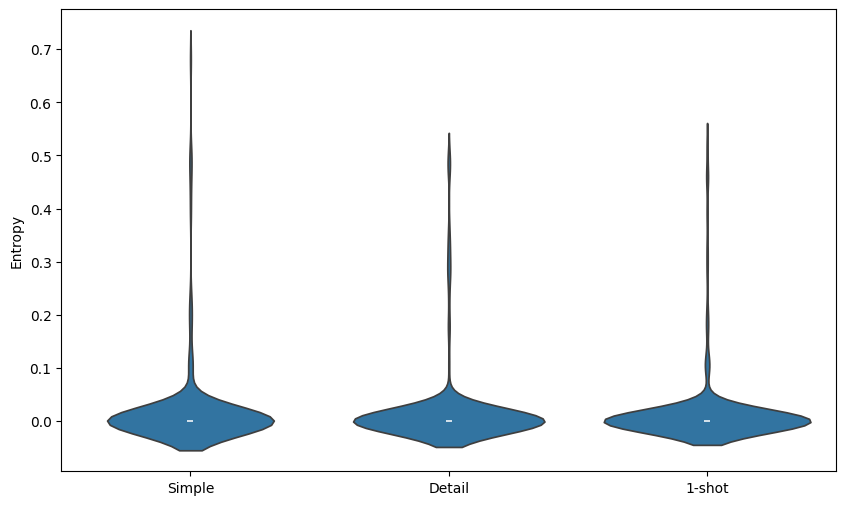

mixtral simple
Avg Entropy over samples: 0.2025819350028748,Std (over questions): 0.21631912058872899
mixtral instruct
Avg Entropy over samples: 0.1254829257129449,Std (over questions): 0.18886259067987113
mixtral fewshot
Avg Entropy over samples: 0.17395903236670035,Std (over questions): 0.1884672973890905


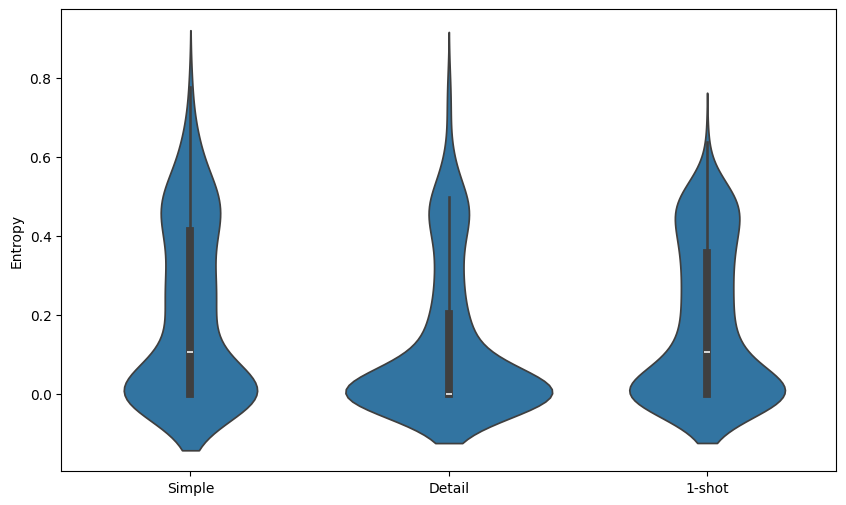

gpt-3.5 simple
Avg Entropy over samples: 0.2736001478504676,Std (over questions): 0.27772995088082414
gpt-3.5 instruct
Avg Entropy over samples: 0.33024036147667896,Std (over questions): 0.2656449666658579
gpt-3.5 fewshot
Avg Entropy over samples: 0.287908711054635,Std (over questions): 0.25211305551301516


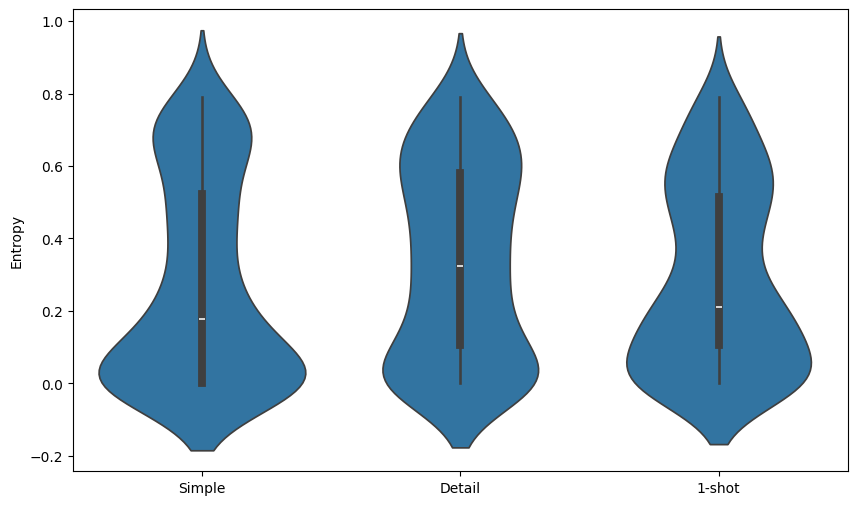

gpt-4o simple
Avg Entropy over samples: 0.08700225297804562,Std (over questions): 0.17448060541787827
gpt-4o instruct
Avg Entropy over samples: 0.081348689736649,Std (over questions): 0.1640242930451322
gpt-4o fewshot
Avg Entropy over samples: 0.05835252751828003,Std (over questions): 0.14519942881975312


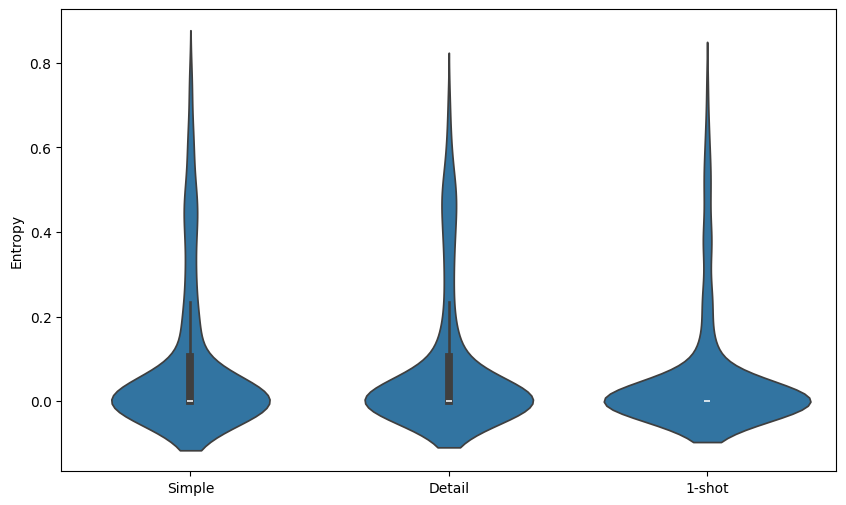

In [6]:
for llm in ['llama3', 'mixtral', 'gpt-3.5', 'gpt-4o']:
    Q = 30
    A = 1  # MUST stay 1
    temp_question = 0.
    temp_answer = 0.
    
    data = []
    
    for prompt_type in ['simple', 'instruct', 'fewshot']:
        print(llm, prompt_type)
        em = print_test_sensitivity_over_samples(sample_ids,
                                        prompt_type,
                                        llm,
                                        Q,
                                        temp_question,
                                        A,
                                        temp_answer,
                                        class_labels,
                                        results_folder)
    
        data.append((em, prompt_type))
    
    # Prepare lists to collect expanded data
    expanded_values = []
    expanded_labels = []
    
    # Expand the data into individual points
    for arr, label in data:
        expanded_values.extend(arr)
        expanded_labels.extend([label] * len(arr))
    
    # Create a DataFrame from the expanded data
    df = pd.DataFrame({'Values': expanded_values, 'Label': expanded_labels})
    
    # Plot the violin plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    ax =sns.violinplot(x='Label', y='Values', data=df, split=False)
    plt.xlabel(None)
    ax.set_xticks(np.arange(3)) # <--- set the ticks first
    ax.set_xticklabels(['Simple', 'Detail', '1-shot'])
    plt.ylabel('Entropy')
    plt.show()

In [8]:
if not os.path.exists(Path(results_folder, 'paper_figures')):
    os.makedirs(Path(results_folder, 'paper_figures'))
    
# Configure matplotlib to use LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Set the global font size
plt.rc('font', size=20)  # Example: set the font size to 14

sns.set_style("whitegrid")
sns.color_palette("colorblind")

dataset="CB"

figsize=(7.5,4.5)
n_samples, n_classes = len(samples), len(class_labels)

for llm in ['llama3', 'mixtral', 'gpt-3.5', 'gpt-4o']:
    Q = 30
    A = 1  # MUST stay 1
    temp_question = 0.
    temp_answer = 0.
    
    data = []

    for prompt_type in ['simple', 'instruct', 'fewshot']:
        print(llm, prompt_type)
        TVD_matrix_per_class = print_consistency(sample_ids,
                                       prompt_type,
                                       llm,
                                       Q,
                                       temp_question,
                                       A,
                                       temp_answer,
                                       class_labels,
                                       results_folder,
                                       filter_zero_sensitivity=False)
    
        for c, TVD_matrix in enumerate(TVD_matrix_per_class):
            data.append((TVD_matrix.reshape(-1), prompt_type))
            
            c_name = class_labels[c]

            # plt.figure(figsize=(figsize[0]+1, figsize[0]))
            # ax = sns.heatmap(TVD_matrix, cbar_kws={'orientation': 'horizontal'})
            # plt.xlabel("Sample ID",fontsize=26)
            # plt.ylabel("Sample ID",fontsize=26)
            # # Adjust the layout to make room for the colorbar
            # plt.tight_layout()
            # plt.savefig(Path(results_folder, 'paper_figures', f'TVD_matrix_{dataset}_{prompt_type}_{llm}_{Q}_{A}_{temp_question}_{temp_answer}_{c_name}.pdf'))
            # #plt.show()

            # plt.figure(figsize=(figsize[0]+1, figsize[0]))
            # sns.histplot(np.reshape(TVD_matrix, -1),
            #                         bins=20, stat='probability', kde=False, color='#3274A1', alpha=1.)
            # plt.xlabel(r"$C_y(x,x')$")
            # plt.tight_layout()
            # plt.savefig(Path(results_folder, 'paper_figures', f'TVD_hist_{dataset}_{prompt_type}_{llm}_{Q}_{A}_{temp_question}_{temp_answer}_{c_name}.pdf'))
            # #plt.show()
    
    
    # Prepare lists to collect expanded data
    expanded_values = []
    expanded_labels = []
    
    # Expand the data into individual points
    for arr, label in data:
        expanded_values.extend(arr)
        expanded_labels.extend([label] * len(arr))
    
    # Create a DataFrame from the expanded data
    df = pd.DataFrame({'Values': expanded_values, 'Label': expanded_labels})
    
    # # Plot the violin plot
    # plt.figure(figsize=figsize)  # Adjust the figure size if needed
    # ax = sns.violinplot(x='Label', y='Values', data=df, split=False)
    # plt.xlabel(None)
    # ax.set_xticks(np.arange(3)) # <--- set the ticks first
    # ax.set_xticklabels(['Simple', 'Detail', '1-shot'])
    # plt.ylim(0, 1)
    # plt.ylabel('Consistency')
    # plt.tight_layout()
    # plt.savefig(Path(results_folder, 'paper_figures',
    #         f'consistency_vs_prompting_{dataset}_{llm}_{Q}_{A}_{temp_question}_{temp_answer}.pdf'))
    # plt.show()

llama3 simple
Prompt type: simple
Avg consistency over classes: 0.9588790005547115,Std consistency over classes: 0.16385973135337478
llama3 instruct
Prompt type: instruct
Avg consistency over classes: 0.9631671610833756,Std consistency over classes: 0.15621207165498258
llama3 fewshot
Prompt type: fewshot
Avg consistency over classes: 0.9619660902491378,Std consistency over classes: 0.17050099596729773
mixtral simple
Prompt type: simple
Avg consistency over classes: 0.6252900176060585,Std consistency over classes: 0.3517007745374916
mixtral instruct
Prompt type: instruct
Avg consistency over classes: 0.6946964763765284,Std consistency over classes: 0.3676898247564955
mixtral fewshot
Prompt type: fewshot
Avg consistency over classes: 0.5969322046161637,Std consistency over classes: 0.36082770928795604
gpt-3.5 simple
Prompt type: simple
Avg consistency over classes: 0.7300846537877145,Std consistency over classes: 0.2840551660749163
gpt-3.5 instruct
Prompt type: instruct
Avg consistency o

llama3 simple
Avg Entropy over samples: 0.01849702694127149,Std (over questions): 0.08292379393338395
llama3 instruct


/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
  sens_per_class_mean = np.array([np.array(sens_per_class[c]).mean() for c in range(len(class_labels))])
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Avg Entropy over samples: 0.016017080609312055,Std (over questions): 0.0734592261159772
llama3 fewshot
Avg Entropy over samples: 0.014100250233563837,Std (over questions): 0.0675239498433903


/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
  sens_per_class_mean = np.array([np.array(sens_per_class[c]).mean() for c in range(len(class_labels))])
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
 

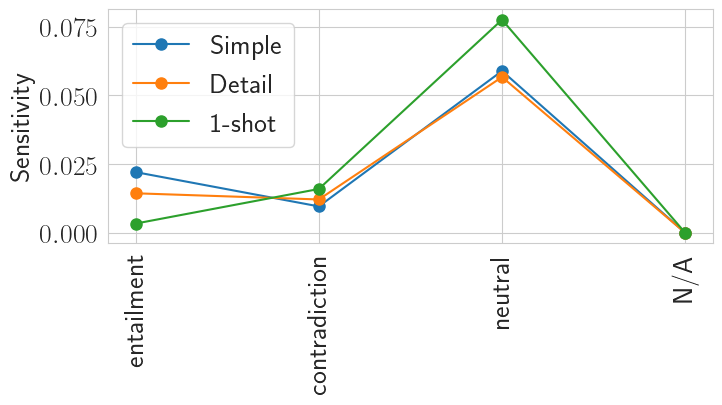

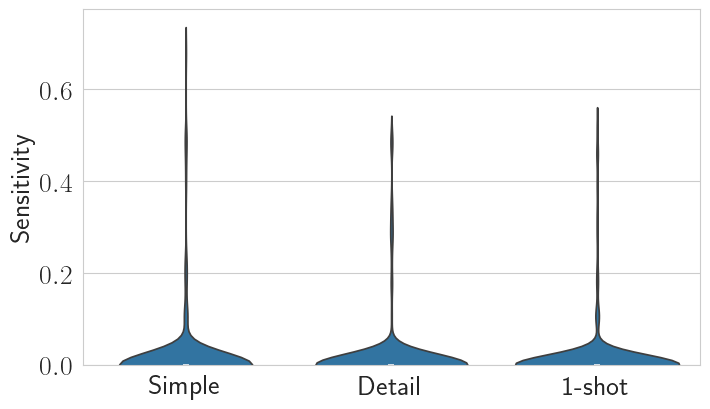

mixtral simple
Avg Entropy over samples: 0.2025819350028748,Std (over questions): 0.21631912058872899
mixtral instruct


/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
  sens_per_class_mean = np.array([np.array(sens_per_class[c]).mean() for c in range(len(class_labels))])
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Avg Entropy over samples: 0.1254829257129449,Std (over questions): 0.18886259067987113
mixtral fewshot
Avg Entropy over samples: 0.17395903236670035,Std (over questions): 0.1884672973890905


/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
  sens_per_class_mean = np.array([np.array(sens_per_class[c]).mean() for c in range(len(class_labels))])
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ferrica/.venv/pydgn/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_919751/3565067473.py:54: RuntimeWarning: Mean of empty slice.
 

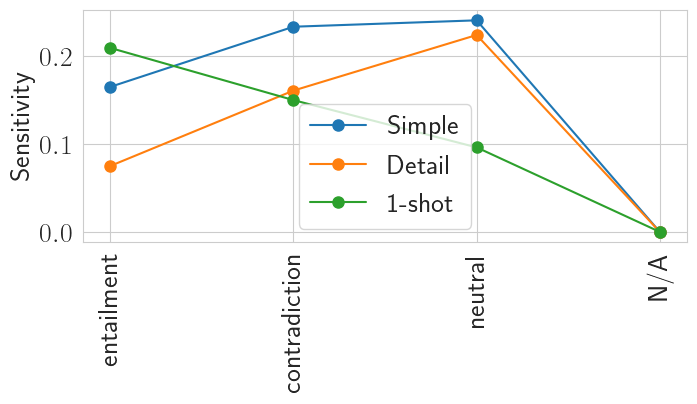

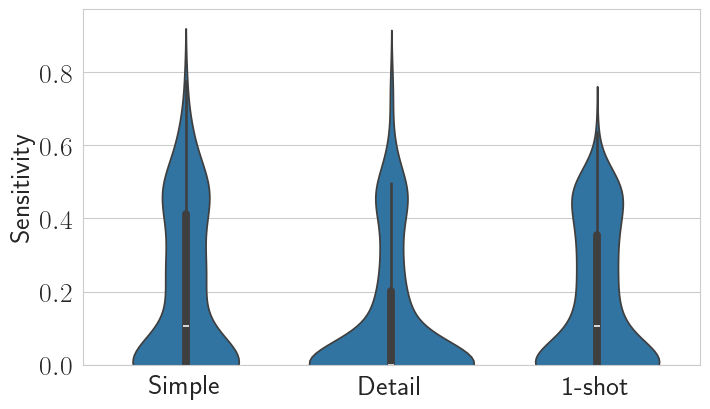

In [11]:
# Configure matplotlib to use LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Set the global font size
plt.rc('font', size=20)  # Example: set the font size to 14

sns.set_style("whitegrid")
sns.color_palette("colorblind")

figsize=(7.5,4.5)

for llm in ['llama3', 'mixtral']:# 'gpt-3.5', 'gpt-4o']:
    Q = 30
    A = 1  # MUST stay 1
    temp_question = 0.
    temp_answer = 0.
    
    data = []

    errorbar_fig = plt.figure(figsize=figsize)

    
    for prompt_type in ['simple', 'instruct', 'fewshot']:
        print(llm, prompt_type)
        em = print_test_sensitivity_over_samples(sample_ids,
                                        prompt_type,
                                        llm,
                                        Q,
                                        temp_question,
                                        A,
                                        temp_answer,
                                        class_labels,
                                        results_folder)

        sens_per_class = sensitivity_per_class(sample_ids,
                                               prompt_type,
                                               llm,
                                               Q,
                                               temp_question,
                                               A,
                                               temp_answer,
                                               class_labels,
                                               results_folder)

        # Add error bars (standard deviation)
        plt.figure(errorbar_fig)
        if prompt_type == 'instruct':
            label = 'Detail'
        elif prompt_type == 'fewshot':
            label = '1-shot'
        else:
            label = 'Simple'

        sens_per_class_mean = np.array([np.array(sens_per_class[c]).mean() for c in range(len(class_labels))])
        sens_per_class_mean = np.nan_to_num(sens_per_class_mean)
        sens_per_class_std = np.array([np.array(sens_per_class[c]).std() for c in range(len(class_labels))])
        sens_per_class_std = np.nan_to_num(sens_per_class_std)
        # plt.errorbar(np.arange(len(class_labels)), sens_per_class_mean, yerr=sens_per_class_std, fmt='-o',  solid_capstyle='projecting', capsize=5, label=label)
        plt.plot(sens_per_class_mean, label=label, marker='o', markersize=8)
        plt.ylabel('Sensitivity')
        plt.xticks(np.arange(len(class_labels)),
                            class_labels,
                            rotation='vertical')      
        plt.legend()
        
        data.append((em, prompt_type))

        plt.figure(errorbar_fig)
    plt.tight_layout()
    plt.savefig(Path(results_folder, 'paper_figures',
                f'sensitivity_vs_class_{dataset}_{llm}_{Q}_{A}_{temp_question}_{temp_answer}.pdf'))
    
    
    # Prepare lists to collect expanded data
    expanded_values = []
    expanded_labels = []
    
    # Expand the data into individual points
    for arr, label in data:
        expanded_values.extend(arr)
        expanded_labels.extend([label] * len(arr))
    
    # Create a DataFrame from the expanded data
    df = pd.DataFrame({'Values': expanded_values, 'Label': expanded_labels})
    
    # Plot the violin plot
    plt.figure(figsize=figsize)  # Adjust the figure size if needed
    ax = sns.violinplot(x='Label', y='Values', data=df, split=False)
    ax.set_xticklabels(['Simple', 'Detail', '1-shot'])
    plt.xlabel(None)
    plt.ylabel('Sensitivity')
    # Setting the y-axis limits to cut off values below 0
    plt.ylim(0, None)
    plt.tight_layout()
    plt.savefig(Path(results_folder, 'paper_figures',
                f'sensitivity_vs_prompting_{dataset}_{llm}_{Q}_{A}_{temp_question}_{temp_answer}.pdf'))
    plt.show()

llama3 simple
Avg Entropy over samples: 0.01849702694127149,Std (over questions): 0.08292379393338395
llama3 instruct
Avg Entropy over samples: 0.016017080609312055,Std (over questions): 0.0734592261159772
llama3 fewshot
Avg Entropy over samples: 0.014100250233563837,Std (over questions): 0.0675239498433903
mixtral simple
Avg Entropy over samples: 0.2025819350028748,Std (over questions): 0.21631912058872899
mixtral instruct
Avg Entropy over samples: 0.1254829257129449,Std (over questions): 0.18886259067987113
mixtral fewshot
Avg Entropy over samples: 0.17395903236670035,Std (over questions): 0.1884672973890905
gpt-3.5 simple
Avg Entropy over samples: 0.2736001478504676,Std (over questions): 0.27772995088082414
gpt-3.5 instruct
Avg Entropy over samples: 0.33024036147667896,Std (over questions): 0.2656449666658579
gpt-3.5 fewshot
Avg Entropy over samples: 0.287908711054635,Std (over questions): 0.25211305551301516
gpt-4o simple
Avg Entropy over samples: 0.08700225297804562,Std (over ques

<Figure size 750x450 with 0 Axes>

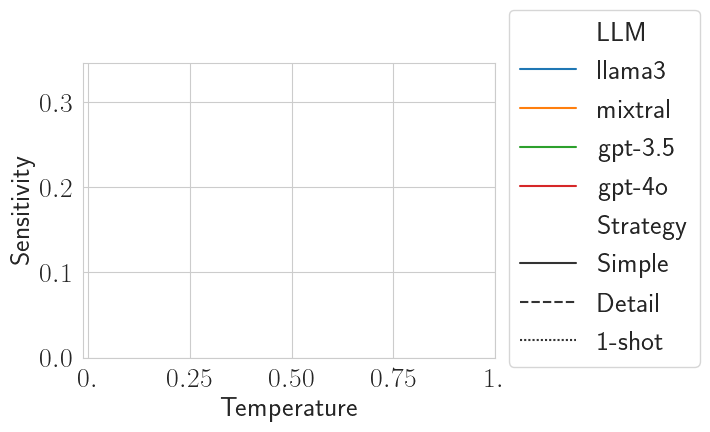

In [7]:
# Configure matplotlib to use LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Set the global font size
plt.rc('font', size=20)  # Example: set the font size to 14

sns.set_style("whitegrid")
sns.color_palette("colorblind")

figsize=(7.5,4.5)

Q = 30
A = 1  # MUST stay 1
temp_answer = 0.


data = []
errorbar_fig = plt.figure(figsize=figsize)
    
for temp_question in temp_questions:
    
    for llm in ['llama3', 'mixtral', 'gpt-3.5', 'gpt-4o']:
        
        for prompt_type in ['simple', 'instruct', 'fewshot']:
            print(llm, prompt_type)
            em = print_test_sensitivity_over_samples(sample_ids,
                                            prompt_type,
                                            llm,
                                            Q,
                                            temp_question,
                                            A,
                                            temp_answer,
                                            class_labels,
                                            results_folder)
    
    
            # Add error bars (standard deviation)
            plt.figure(errorbar_fig)
            if prompt_type == 'instruct':
                label = 'Detail'
            elif prompt_type == 'fewshot':
                label = '1-shot'
            else:
                label = 'Simple'
    
            
            data.append((em.mean(), label, llm, int(temp_question/0.25)))
            
        
        
# Create a DataFrame from the expanded data
df = pd.DataFrame(data, columns=['Sensitivity', 'Strategy', 'LLM', 'Temperature'])
print(df)
# Plot the violin plot
plt.figure(figsize=figsize)  # Adjust the figure size if needed
ax = sns.lineplot(x='Temperature', y='Sensitivity', hue='LLM', style='Strategy', data=df)
ax.set_xticks(np.arange(5)) # <--- set the ticks first
ax.set_xticklabels([r'$0.$', r'$0.25$', r'$0.50$', r'$0.75$', r'$1.$'])
# Setting the y-axis limits to cut off values below 0
plt.ylim(0, None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.575))
plt.tight_layout()
plt.savefig(Path(results_folder, 'paper_figures',
            f'sensitivity_vs_temperature_{dataset}_{Q}_{A}_{temp_answer}.pdf'))
plt.show()